In [1]:
import os
import glob
import sox
import tqdm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from multiprocessing import Pool

%matplotlib inline  

In [2]:
num_parallel = 16
datapath_root = '/home/tracek/Data/gender/raw/'
datapath_male = os.path.join(datapath_root, 'male/')
datapath_female = os.path.join(datapath_root, 'female/')

In [3]:
waves_male_paths = glob.glob(datapath_male + '/**/*.wav', recursive=True)
waves_female_paths = glob.glob(datapath_female + '/**/*.wav', recursive=True)
readme_paths = glob.glob(datapath_root + '/**/README', recursive=True)

In [4]:
assert len(os.listdir(datapath_male)) + len(os.listdir(datapath_female)) == len(readme_paths)

In [5]:
def get_info(path):
    info = sox.file_info.info(path)
    info['path'] = path
    if 'num_samples' not in info:
        print('No samples in ', path)
    return info

In [6]:
pool = Pool(processes=num_parallel)
male_info = pool.map(get_info, waves_male_paths)
female_info = pool.map(get_info, waves_female_paths)

In [7]:
def get_readme_info(path):
    d = {}
    with open(path, 'r') as readme:
        for line in readme:
            gender_match = re.search("Gender: (\W*\w+\W*)", line, re.IGNORECASE)
            age_match = re.search("Age Range: (\W*\w+\W*)", line, re.IGNORECASE)
            lang_match = re.search("Language: (\W*\w+\W*)", line, re.IGNORECASE)

In [8]:
duration_male = np.array([info['duration'] for info in male_info])
duration_female = np.array([info['duration'] for info in female_info])
total_male = int(duration_male.sum())
total_female = int(duration_female.sum())
print('Total duration of male recordings: {} '.format(str(timedelta(seconds=total_male))))
print('Total duration of female recordings: {} '.format(str(timedelta(seconds=total_female))))

Total duration of male recordings: 3 days, 22:45:15 
Total duration of female recordings: 17:02:11 


Text(0.5,1,'Duration histogram - up to 10s')

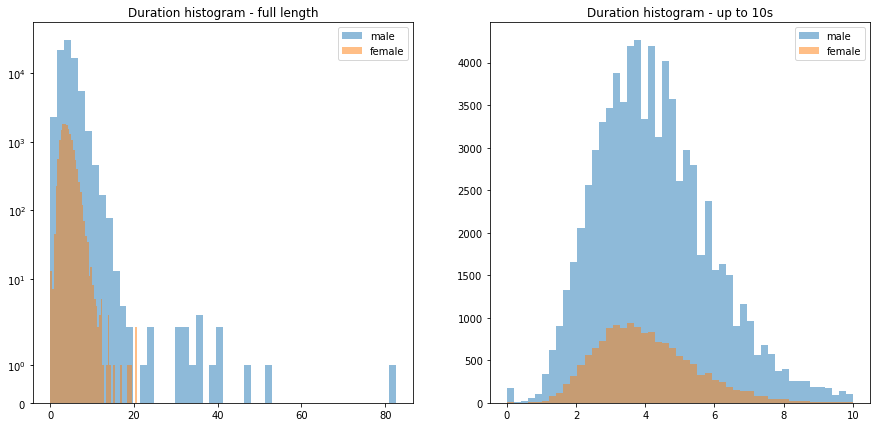

In [9]:
no_bins = 50
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_yscale('symlog')
_ = ax[0].hist(duration_male, bins=no_bins, alpha=0.5, label='male')
_ = ax[0].hist(duration_female, bins=no_bins, alpha=0.5, label='female')
bins = np.linspace(0, 10, no_bins)
_ = ax[1].hist(duration_male, bins=bins, alpha=0.5, label='male')
_ = ax[1].hist(duration_female, bins=bins, alpha=0.5, label='female')
ax[0].legend(loc='upper right')
ax[0].set_title('Duration histogram - full length')
ax[1].legend(loc='upper right')
ax[1].set_title('Duration histogram - up to 10s')

In [10]:
name_duration_tuples_m = [(info['path'], info['duration']) for info in male_info]
name_duration_tuples_m_short = [(info['path'], info['duration']) for info in male_info if info['duration'] < 0.5]

In [11]:
len(name_duration_tuples_m_short)

183